In [ ]:

Results for Initial:
Mutual information: 1.1582 bits
Lower bound: 1.1149 bits
Upper bound: 1.2002 bits
Confidence interval: 0.0853 bits

Results for Intermediate:
Mutual information: 1.1852 bits
Lower bound: 1.1331 bits
Upper bound: 1.2193 bits
Confidence interval: 0.0862

Results for Final:
Mutual information: 1.2135 bits
Lower bound: 1.1649 bits
Upper bound: 1.2524 bits
Confidence interval: 0.0876 bits


In [ ]:
# Results for /home/emarkley/Workspace/PYTHON/EncodingInformation/color filter array/recon results/e2e 1000
MSE: 0.00010042 (95% CI: 0.00009576 - 0.00010550

# Results for tuned_model_e2e_1000_photons
Mutual information: 1.1662 bits
Lower bound: 1.1300 bits
Upper bound: 1.2033 bits
Confidence interval: 0.0732

In [ ]:
# This is the results from the final ideal mask
# I cant seem to find the results from the intermediate and initial masks. 
Results for /home/emarkley/Workspace/PYTHON/EncodingInformation/color filter array/recon results/ideal 1000 photon
MSE: 0.00009305 (95% CI: 0.00008895 - 0.00009729


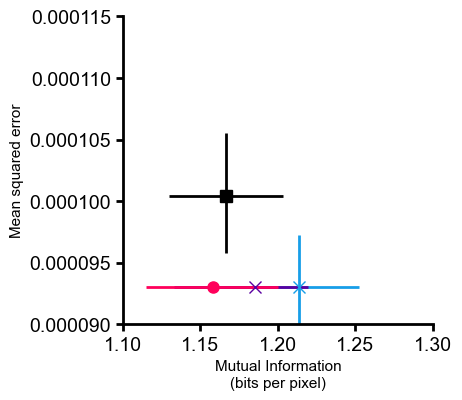

In [3]:
from cleanplots import *


data = {
    'e2e': {
        'mi': [1.1662, 1.1662-1.1300, 1.2033-1.1662],  # [1.1662, 0.0362, 0.0371]
        'mse': [0.00010042, 0.00010042-0.00009576, 0.00010550-0.00010042]  # [0.00010042, 0.00000466, 0.00000508]
    },
    'initial': {
        'mi': [1.1582, 1.1582-1.1149, 1.2002-1.1582],  # [1.1582, 0.0433, 0.0420]
        'mse': [0.00009305, 0, 0]  # [0.00009305, 0.00000410, 0.00000424]
    },
    'intermediate': {
        'mi': [1.1852, 1.1852-1.1331, 1.2193-1.1852],  # [1.1852, 0.0521, 0.0341]
        'mse': [0.00009305, 0, 0]  # [0.00009305, 0.00000410, 0.00000424]
    },
    'final': {
        'mi': [1.2135, 1.2135-1.1649, 1.2524-1.2135],  # [1.2135, 0.0486, 0.0389]
        'mse': [0.00009305, 0.00009305-0.00008895, 0.00009729-0.00009305]  # [0.00009305, 0.00000410, 0.00000424]
    }
}


# Extract data for the three stages
stages = ['initial', 'intermediate', 'final'][::-1]
mi = [data[stage]['mi'][0] for stage in stages]
mse = [data[stage]['mse'][0] for stage in stages]
mi_err = [[[data[stage]['mi'][1]], [data[stage]['mi'][2]]] for stage in stages]
mse_err = [[[data[stage]['mse'][1]], [data[stage]['mse'][2]]] for stage in stages]

# Extract e2e data
e2e_mi = data['e2e']['mi'][0]
e2e_mse = data['e2e']['mse'][0]
e2e_mi_err = [[data['e2e']['mi'][1]], [data['e2e']['mi'][2]]]
e2e_mse_err = [[data['e2e']['mse'][1]], [data['e2e']['mse'][2]]]

# Create figure
fig, ax = plt.subplots(figsize=(4, 4))
markers = ['x', 'x', 'o']
# Plot error bars with markers
for i in range(len(mi)):
    ax.errorbar(mi[i], mse[i], 
                xerr=mi_err[i], yerr=mse_err[i],
                fmt=markers[i], 
                markersize=8, capsize=0, linewidth=2,
                label='95% confidence' if i == 0 else '')
ax.errorbar(e2e_mi, e2e_mse,
                xerr=e2e_mi_err, yerr=e2e_mse_err,
                fmt='s', 
                color='k',
                markersize=8, capsize=0, linewidth=2)
# Set labels and formatting
ax.set_xlabel('Mutual Information\n(bits per pixel)', fontsize=11)
ax.set_ylabel('Mean squared error', fontsize=11)
ax.set(xlim=[1.1, 1.3], ylim=[9e-5, 11.5e-5])
clear_spines(ax)

fig.savefig('/home/hpinkard_waller/figures/IDEAL_E2E_final.pdf', transparent=True)